<a href="https://colab.research.google.com/github/rzunick/MNA-Proyecto-Integrador-Equipo-43/blob/main/Avance_2_Equipo_43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portada
Instituto Tecnológico de Estudios Superiores de Monterrey

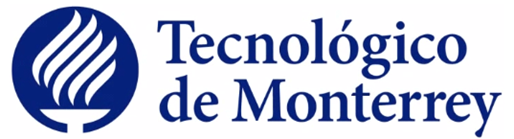

Maestría en Inteligencia Artificial Aplicada (MNA)
Curso: TC5035 Proyecto Integrador

Profesores: Dra. Grettel Barceló Alonso y Dr. Luis Eduardo Falcón

Proyecto: Reconocimiento y Clasificación de Objetos basado en Colores para Detección en Vivo en Cámaras de Seguridad
##Avance 2. Ingenieria de Características


Equipo 43
* Ronald David Zuniga Sanchez - A01686240

#1 - Introducción

En el presente avance del Proyecto Integrador **Reconocimiento y Clasificación de Objetos basado en Colores para Detección en Vivo en Cámaras de Seguridad**, se desarrollan técnicas de ingeniería de características (Feature engineering) para preparar el conjunto de datos para el proceso de desarrollo y entrenamiento del modelo.

Se desarrolla la creación de la característica de color dominante o color principal del objeto segmentado con el objetivo de crear una nueva etiqueta/label/feature en el dataset que funcione como característica principal.

#2 - Importando el Dataset

##Instalación de dependencias

In [1]:
# Instalar aplicación y libreriás de Fifty One para la importación y análisis del dataset.
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 9.9 MB/s eta 0:00:00
  Installing build dependenci

**Instalación de libreria SciKit Learn en fiftyone**

In [2]:
!pip install -U scikit-learn fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
# Carga de aplicación y herramienta de importación de datasets de Fifty One.
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
from fiftyone import ViewField as F

Migrating database to v0.23.8


INFO:fiftyone.migrations.runner:Migrating database to v0.23.8


In [20]:
# Load a subset of the COCO dataset
dataset_color_val = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["segmentations"],
    classes=["person", "car"],  # specify classes you're interested in
    max_samples=50,
)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████████| 50/50 [900.3ms elapsed, 0s remaining, 55.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 50/50 [900.3ms elapsed, 0s remaining, 55.5 samples/s]      


Dataset 'coco-2017-validation-50' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-50' created


#3 - Creación de nuevas características (Feature Engineering)

Considerando la metodología para el entrenamiento de un modelo basado en redes convolucionales (CNN) para la detección de color en vehículos [13], se determina el objetivo de contar con un conjunto de datos pre-etiquetado con el color dominante o color principal del objeto de interés.

Considerando esto, se determina utilizar la instancia segmentada del dataset COCO para agregar dos nuevas características a cada imagen utilizando las referencias de documentación de formato COCO [14][15] y la librería de scikit image color [16]:

1. Valor RGB del color dominante del objeto segmentado.
2. Etiqueta tipo string de color dominante.

Con el objetivo de continuar utilizando la librería de Fifty One para la visualización y exploración del dataset, se determina procesar las nuevas etiquetas y agregarlas al conjunto de características del dataset.

Se determina utilizar la siguiente estrategia:

1. Load the COCO Dataset into FiftyOne to import the COCO dataset into FiftyOne.

2. Analyzing the Color of Segmented Areas by developing a custom script to analyze the colors within the boundaries of segmentation masks. This generally involves calculating the dominant color or the average color in the segmented region.

3. Adding New Labels to the Dataset once color information is estimated adding this as new label data to the FiftyOne dataset.

Importando dependencias

In [41]:
from skimage import io, color
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

Desarrollo de algoritmo para estimación de color dominante

In [30]:
def get_dominant_color(image, mask):
    # Resize mask to match image dimensions
    mask_resized = resize(mask, image.shape[:2], order=0, preserve_range=True, anti_aliasing=False).astype(bool)
    # Applying resized mask to the image
    masked_image = image[mask_resized]
    # Convert the image from RGB to LAB color space to better analyze the colors
    lab_image = color.rgb2lab(masked_image.reshape(-1, 3))
    # Compute the mean color
    mean_color = lab_image.mean(axis=0)
    # Optionally, convert mean color back to RGB
    return color.lab2rgb(mean_color.reshape(1, 1, 3)).flatten()

In [32]:
# Iterate over the samples in the dataset
for sample in dataset_color_val:
    image_path = sample.filepath
    image = io.imread(image_path)
    for detection in sample.ground_truth.detections:
        mask = detection.mask  # Assuming 'mask' is already a numpy array
        if mask is not None and image is not None:
            dominant_color = get_dominant_color(image, mask)
            # Update the detection with the dominant color
            detection['dominant_color'] = dominant_color.tolist()  # Convert to list for serialization
        sample.save()

In [33]:
sample.save()  # Saves the changes to each sample

How the Dominant Color is Computed and Stored:

1. Color Conversion:

The get_dominant_color function first applies the mask to the image, extracting only the pixels that fall within the segmented area.
These pixels are then converted from the RGB color space to the LAB color space using color.rgb2lab. The LAB color space is often preferred for color processing because it is more uniform with respect to human vision, meaning changes in colors in LAB space correspond more closely to what we perceive as similar changes in color.

2. Calculating the Mean Color:

After conversion to LAB space, the mean (average) of these colors is computed. This mean calculation gives you the average LAB color of all the pixels within the mask.

3. Converting Back to RGB:

The mean color in LAB space is then converted back to RGB using color.lab2rgb. This step is important because RGB is a more commonly used and understood color representation, especially for displaying or using these colors in applications that expect RGB values.

4. Formatting the Color:

The resulting RGB color, which is a floating-point array of three elements (representing the R, G, and B channels), is then flattened and converted to a list using .flatten() and .tolist(). Each element of this list is a floating-point number between 0 and 1, where 0 represents no intensity and 1 represents maximum intensity for that color channel.
For example, a color might be represented as [0.85, 0.66, 0.47], indicating a shade that has 85% of the maximum possible red, 66% of the maximum possible green, and 47% of the maximum possible blue.

5. Storing the Color:

This list of RGB values is then stored in the dataset under the key 'dominant_color' for each respective detection. This numeric representation is versatile and can be used directly for visualizations, comparisons, or as input to further processing steps.

Usage:

The stored RGB values are numeric and represent the actual color visually. They are not labeled categories like "red" or "blue," but precise quantitative measures of color intensity in the RGB model. This allows for accurate color analysis and usage in a variety of applications, from digital graphics to machine learning tasks involving color.

**Visualización de estimación de color dominante**

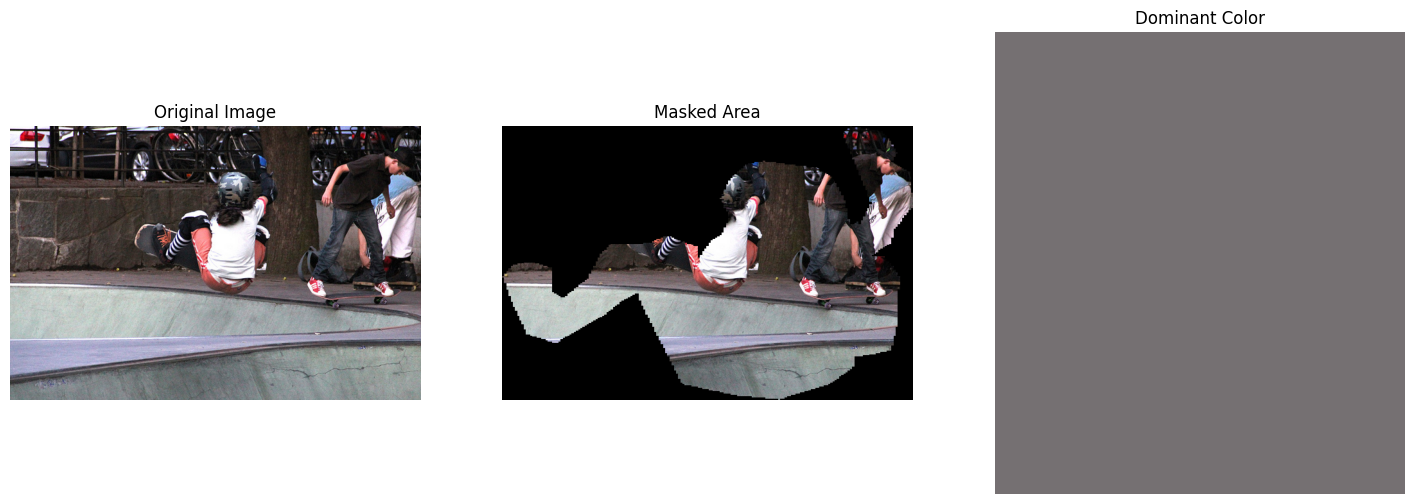

In [55]:
# Retrieve a random sample from the dataset
sample = dataset_color_val.take(1).first()

# Load the image
image = io.imread(sample.filepath)

# Create a figure and axes
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Adjust for three subplots

# Display the original image
ax[0].imshow(image)
ax[0].axis('off')  # Hide the axes ticks
ax[0].set_title("Original Image")

# Assuming there is at least one detection and it has a 'dominant_color' field
if sample.ground_truth.detections:
    detection = sample.ground_truth.detections[0]
    color = detection['dominant_color']
    mask = detection.mask  # Assuming mask is a numpy array

    # Resize mask to match the image dimensions
    mask_resized = resize(mask, image.shape[:2], order=0, preserve_range=True).astype(bool)

    # Display the mask overlay on the image
    masked_image = np.zeros_like(image)
    for c in range(3):  # Apply mask to each color channel
        masked_image[:, :, c] = image[:, :, c] * mask_resized

    # Display the masked image
    ax[1].imshow(masked_image)
    ax[1].axis('off')
    ax[1].set_title("Masked Area")

    # Display the dominant color
    rgb_color = np.array(color)
    ax[2].add_patch(plt.Rectangle((0, 0), 1, 1, color=rgb_color))
    ax[2].set_xlim([0, 1])
    ax[2].set_ylim([0, 1])
    ax[2].axis('off')
    ax[2].set_title("Dominant Color")

plt.show()

Dataset Loading: The code starts by loading the dataset. Replace "name-of-your-dataset" with the actual name of your dataset.

Image Loading: It retrieves the first sample from the dataset and loads the image.

Figure and Axes Creation: It sets up a Matplotlib figure with two subplots: one for the original image and another for displaying the dominant color.

Image Display: The original image is shown on the first subplot.

Dominant Color Extraction: It assumes that there is at least one detection in the image that has a 'dominant_color' attribute (ensure this field is populated as described in previous scripts).

Color Visualization: A patch of the dominant color is created and displayed in the second subplot. This uses the RGB color stored in the detection. The label shows the RGB values.

Plot Adjustment: Axes and titles are adjusted, and the color patch is added with a legend that shows the RGB values of the color.

**Visualización de nuevo dataset en Fifty One**

In [35]:
# Ejecución de aplicación FiftyOne App para exploración visual de dataset
session = fo.launch_app(dataset_color_val)

Contenido

#4 - Conclusiones

#5 - Referencias

1. Smits, Thomas & Wevers, Melvin. (2021). The agency of computer vision models as optical instruments. Visual Communication. 21. 147035722199209. 10.1177/1470357221992097.

2. Top 10 Datasets for Computer Vision · Syntric AI. (2022). Retrieved from https://www.syntric.ai/post/unlocking-computer-vision-the-10-best-datasets

3. Common Objects in Context. (n.d.). Retrieved from https://cocodataset.org/#home

4. Meel, V. (2024). What is the COCO Dataset? What you need to know in 2024. Retrieved from https://viso.ai/computer-vision/coco-dataset/

5. Maitlo, N., Noonari, N., Ghanghro, S. A., Duraisamy, S., & Ahmed, F. (2024). Color Recognition in Challenging Lighting Environments: CNN Approach. ArXiv. /abs/2402.04762

6. De, K., & Pedersen, M. (2021). Impact of Colour on Robustness of Deep Neural Networks. 2021 IEEE/CVF International Conference on Computer Vision Workshops (ICCVW), 21–30. https://doi.org/10.1109/ICCVW54120.2021.00009

7. FiftyOne by Voxel 51. (n.d.). Retrieved from https://docs.voxel51.com/

8. COCO Dataset Integration in Fifty One. (n.d.). Retrieved from https://docs.voxel51.com/integrations/coco.html?highlight=coco

9. Hofesmann, E. (2022). The COCO Dataset: Best Practices for Downloading, Visualization, and Evaluation. Retrieved from https://medium.com/voxel51/the-coco-dataset-best-practices-for-downloading-visualization-and-evaluation-68a3d7e97fb7

10. Clustering Images with Embeddings. (n.d.). Retrieved from https://docs.voxel51.com/tutorials/clustering.html

11. Gallagher, J. (2024). Color and Product Type Inspection with Computer Vision. Retrieved from https://blog.roboflow.com/how-to-analyze-product-color/

12. Lin, T.-Y., Maire, M., Belongie, S., Bourdev, L., Girshick, R., Hays, J., … Dollár, P. (2015). Microsoft COCO: Common Objects in Context. Retrieved from https://arxiv.org/abs/1405.0312

13. Rachmadi, R. F., & Purnama, I. K. E. (2018). Vehicle Color Recognition using Convolutional Neural Network. Retrieved from https://arxiv.org/abs/1510.07391

14. Hofesmann, E. (2021). How to work with object detection datasets in COCO format. Retrieved from https://towardsdatascience.com/how-to-work-with-object-detection-datasets-in-coco-format-9bf4fb5848a4

15. Prepare COCO datasets¶. (n.d.). Retrieved from https://cv.gluon.ai/build/examples_datasets/mscoco.html

16. skimage.color#. (n.d.). Retrieved from https://scikit-image.org/docs/dev/api/skimage.color.html